In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("heights.csv")
df.head()

,name,height
0,mohan,1.2
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2


## Remove Outlier using IQR

In [20]:
Q1,Q3=df.height.quantile([0.25,0.75])
Q1,Q3

(5.3500000000000005, 6.275)

In [21]:
IQR=Q3-Q1
IQR

0.9249999999999998

In [22]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(3.962500000000001, 7.6625)

In [23]:
# No Outlier is the lower_limit < x < Higher_limit
# the value which is less than the lower limit and greater than the higher limit this is Outlier
df[df.height<lower_limit]             ## lower limit outlier

,name,height
0,mohan,1.2


In [24]:
df[df.height>upper_limit]               ## higher limit outlier

,name,height
19,Liu,40.2


In [26]:
## Check Outlier
df[(df.height<lower_limit) | (df.height>upper_limit)]

,name,height
0,mohan,1.2
19,Liu,40.2


In [28]:
## Remove Outlier
no_outlier_df=df[(df.height>lower_limit) & (df.height<upper_limit)]
no_outlier_df

,name,height
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8


## Remove Outlier Using Box Plot

In [29]:
df=pd.read_excel("region_wise_sales.xlsx")
df.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [30]:
df.Region.unique()

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [31]:
## Make the different dataframe for each Region 
df_apac = df[df.Region=="APAC"]
df_europe = df[df.Region=="Europe"]
df_americas = df[df.Region=="Americas"]

In [49]:
## Create the function which calculate the lower and upper limit
def get_limit(data):
    Q1,Q3 = data.Sales.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    return lower,upper

In [50]:
#  Cal for the APAC
lower,upper=get_limit(df_apac)
lower,upper

(-737.125, 59747.875)

In [51]:
df_apac.Sales.describe()

count       12.000000
mean     29762.166667
std       7725.522905
min      18579.000000
25%      21944.750000
50%      31215.500000
75%      37066.000000
max      38143.000000
Name: Sales, dtype: float64

In [52]:
df_apac[(df_apac.Sales>upper)|(df_apac.Sales<lower)]
#  Here there is no Outlier Detected for APAC Region 

,Month,Year,Region,Sales


In [53]:
#  Cal for the Europe
lower,upper=get_limit(df_europe)
lower,upper

(7306.875, 17665.875)

In [54]:
df_europe.describe()

,Year,Sales
count,12.0,12.000000
mean,2022.0,13147.583333
std,0.0,3549.568795
min,2022.0,9665.000000
25%,2022.0,11191.500000
50%,2022.0,12044.000000
75%,2022.0,13781.250000
max,2022.0,23000.000000


In [55]:
#  outlier is detected

In [47]:
df_europe[(df_europe.Sales>upper)|(df_europe.Sales<lower)]         ## get only one Outlier

,Month,Year,Region,Sales
21,October,2022,Europe,23000


In [57]:
labels=df.Region.unique()
labels

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [63]:
# make the array of all region wise data to plot data

## it filtered the each region data wise value and from that print sales value
plot_data=[df["Sales"][df["Region"]==label].values for label in labels]
plot_data

[array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
        37279, 21388, 21896]),
 array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
        23000, 12215, 14895]),
 array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
        28257, 30691, 29387])]

C:\Users\Shubham Pangavhane\AppData\Local\Temp\ipykernel_17960\371944615.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot_data,labels=labels,patch_artist=True)


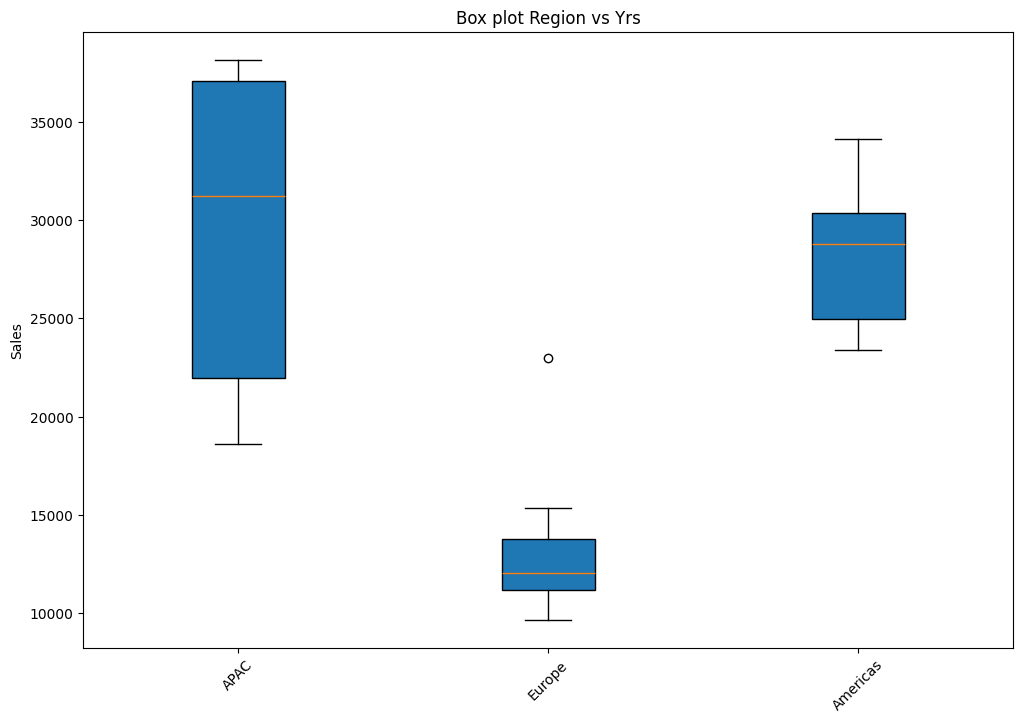

In [76]:
# plot the box
plt.figure(figsize=(12,8))
plt.boxplot(plot_data,labels=labels,patch_artist=True)
plt.title("Box plot Region vs Yrs")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()